# Exercício 2 - FAV Enunciado Análise de Dados

**Importação de módulos**

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd

**Carregamento do ficheiro de dados**

In [14]:
filename_data_source = 'data/Airplane_Crashes_and_Fatalities_Since_1908.csv'
df = pd.read_csv(filename_data_source)

**Primeira análise dos dados**

In [15]:
df.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


In [16]:
df.columns
#Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
#       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
#      dtype='object')

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [17]:
df.shape
#(5268, 13)

(5268, 13)

In [18]:
# Verificar o tipo de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [19]:
# Ver a percentagem de valores em falta por coluna
df.isnull().mean().sort_values(ascending=False) * 100

Flight #        79.707669
Time            42.122248
Route           32.403189
cn/In           23.310554
Summary          7.403189
Registration     6.359150
Type             0.512528
Ground           0.417616
Aboard           0.417616
Location         0.379651
Operator         0.341686
Fatalities       0.227790
Date             0.000000
dtype: float64

🧹 Conversão e tratamento de datas

In [21]:
# Converter a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [22]:
# Há muitos valores em falta na coluna 'Time'. 
# O que será melhor? Ou fazer drop ou preencher com um valor padrão?
# Opção 2... preencher valores em falta com '00:00'
df['Time'] = df['Time'].fillna("00:00")

# Também existem campos com valores 'c:' antes da hora.
# Remover o 'c:' e espaços em branco e presenvar as horas
df['Time'] = df['Time'].astype(str).str.replace("c:", "", regex=False).str.strip()


# Garantir que todos os valores contêm dois pontos (formato hh:mm); caso contrário, substituir por "00:00"
valid_time_mask = df['Time'].str.contains(r"^\d{1,2}:\d{2}$", regex=True)
df.loc[~valid_time_mask, 'Time'] = "00:00"


🧾 Criar colunas auxiliares

In [23]:
# Criar colunas com ano, mês e dia
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

1️⃣ Converter colunas numéricas

In [24]:
for col in ['Aboard', 'Fatalities', 'Ground']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

🚨 Criar número de sobreviventes e taxa de fatalidade

In [25]:
df['Survivors'] = df['Aboard'] - df['Fatalities']
df['Fatality Rate'] = df['Fatalities'] / df['Aboard']

✨ Limpeza de texto

In [26]:
cols_to_clean = ['Location', 'Operator', 'Type', 'Route']
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.strip().str.title()

🧽 Remoção de dados inválidos

# Parte 2: Processamento de Dados

In [29]:
# Agrupamentos (groupby) interessantes
acidentes_por_ano = df.groupby('Year').size()
acidentes_por_ano

Year
1908     1
1912     1
1913     3
1915     2
1916     5
        ..
2005    51
2006    49
2007    54
2008    62
2009    24
Length: 98, dtype: int64

In [31]:
# Total de fatalidades por operador (companhia):
mortes_por_operador = df.groupby('Operator')['Fatalities'].sum().sort_values(ascending=False)
mortes_por_operador


Operator
Aeroflot                                  7156.0
Military - U.S. Air Force                 3717.0
Air France                                1734.0
American Airlines                         1421.0
Pan American World Airways                1302.0
                                           ...  
Ararat Avia                                  0.0
Island Sky Ferry - Air Taxi                  0.0
Us Airways                                   0.0
Regional Compagnie Aerienne Europeenne       0.0
Southwest Airlines                           0.0
Name: Fatalities, Length: 2470, dtype: float64

In [32]:
# Acidentes por tipo de aeronave:
acidentes_por_tipo = df['Type'].value_counts()
acidentes_por_tipo

Type
Douglas Dc-3                                334
De Havilland Canada Dhc-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas Dc-4                                 40
                                           ... 
Zeppelin L-53 (Airship)                       1
B17G Flying Fortress                          1
Douglas C-54E-Do (Dc-4)                       1
De Havilland Dh.4                             1
Schutte-Lanz S-L-10 (Airship)                 1
Name: count, Length: 2409, dtype: int64

In [33]:
# Taxa média de fatalidade por operador (com operadores que têm pelo menos N voos, para evitar ruído):
operadores_filtrados = df.groupby('Operator').filter(lambda x: len(x) >= 5)
taxa_fatalidade_op = operadores_filtrados.groupby('Operator')['Fatality Rate'].mean().sort_values(ascending=False)
taxa_fatalidade_op

Operator
Grands Express Aeriens            1.000000
Military - Sri Lanka Air Force    1.000000
Military - Chinese Air Force      1.000000
Lloyd Aereo Boliviano             1.000000
Military - Pakistan Air Force     1.000000
                                    ...   
National Airlines                 0.487898
Allegheny Airlines                0.463731
Korean Airlines                   0.441574
Air Canada                        0.427718
Continental Airlines              0.293933
Name: Fatality Rate, Length: 161, dtype: float64

In [34]:
# Acidentes com 100% de fatalidade:
acidentes_fatais = df[df['Fatality Rate'] == 1.0]

# Acidentes com sobreviventes:
acidentes_com_sobreviventes = df[df['Survivors'] > 0]

# Acidentes desde 2000:
df_2000_em_diante = df[df['Year'] >= 2000]

Criação de novas colunas

In [35]:
# Década do acidente (para análise temporal mais agregada):
df['Decade'] = (df['Year'] // 10) * 10

In [36]:
# Categoria de gravidade (ex: leve, moderado, grave):
def classificar_gravidade(row):
    if pd.isna(row['Fatality Rate']):
        return 'Desconhecido'
    elif row['Fatality Rate'] == 0:
        return 'Sem mortes'
    elif row['Fatality Rate'] < 0.5:
        return 'Moderado'
    elif row['Fatality Rate'] < 1.0:
        return 'Grave'
    else:
        return 'Total'

df['Gravidade'] = df.apply(classificar_gravidade, axis=1)

# 📊 Parte 3: Visualização de Dados

📈 Acidentes por ano

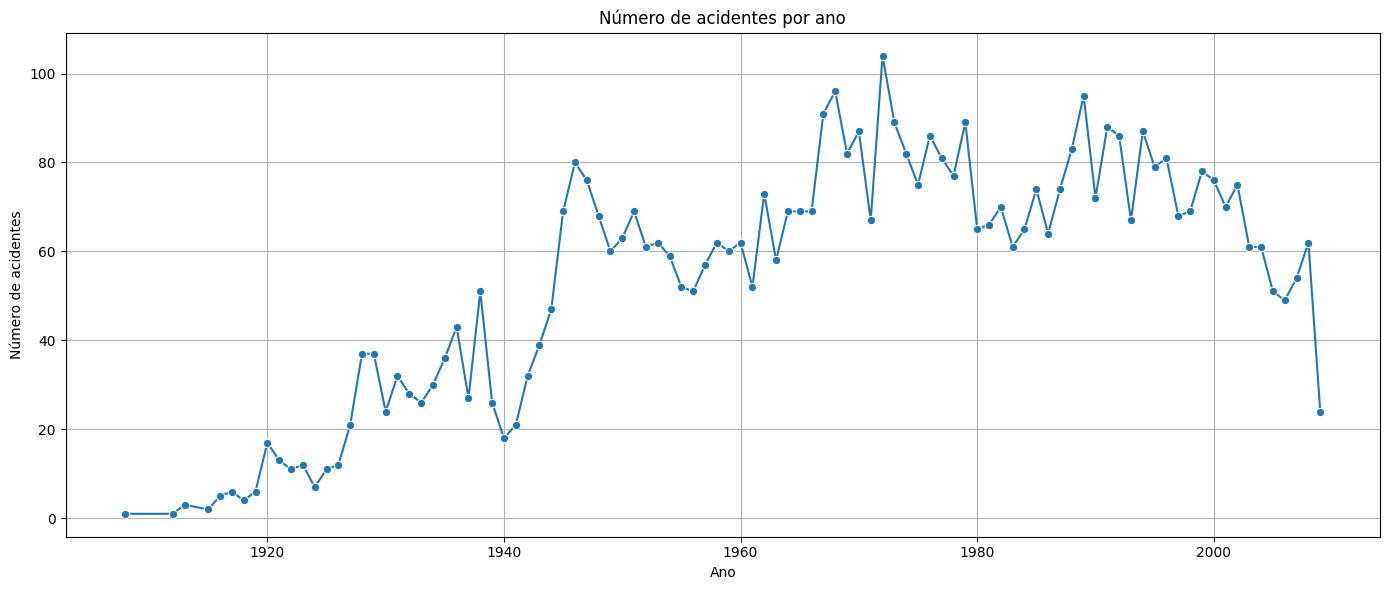

In [37]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby('Year').size(), marker='o')
plt.title('Número de acidentes por ano')
plt.xlabel('Ano')
plt.ylabel('Número de acidentes')
plt.grid(True)
plt.tight_layout()
plt.show()

🔥 Top 10 operadores com mais fatalidades

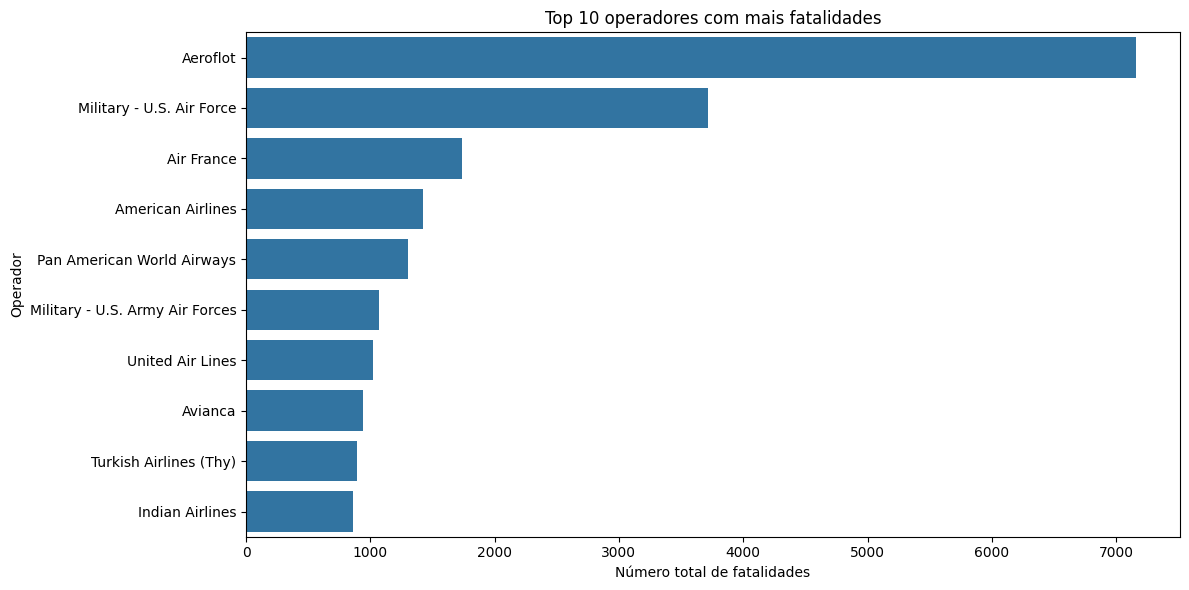

In [38]:
top_10_mortes_op = df.groupby('Operator')['Fatalities'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_10_mortes_op.values, y=top_10_mortes_op.index)
plt.title('Top 10 operadores com mais fatalidades')
plt.xlabel('Número total de fatalidades')
plt.ylabel('Operador')
plt.tight_layout()
plt.show()


💀 Distribuição da taxa de fatalidade

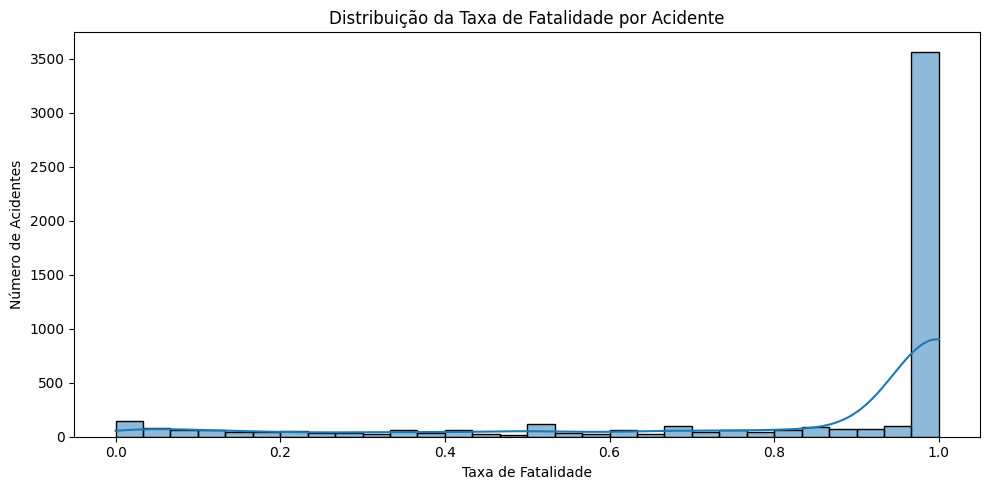

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fatality Rate'].dropna(), bins=30, kde=True)
plt.title('Distribuição da Taxa de Fatalidade por Acidente')
plt.xlabel('Taxa de Fatalidade')
plt.ylabel('Número de Acidentes')
plt.tight_layout()
plt.show()

🛬 Número de acidentes por tipo de aeronave (Top 10)

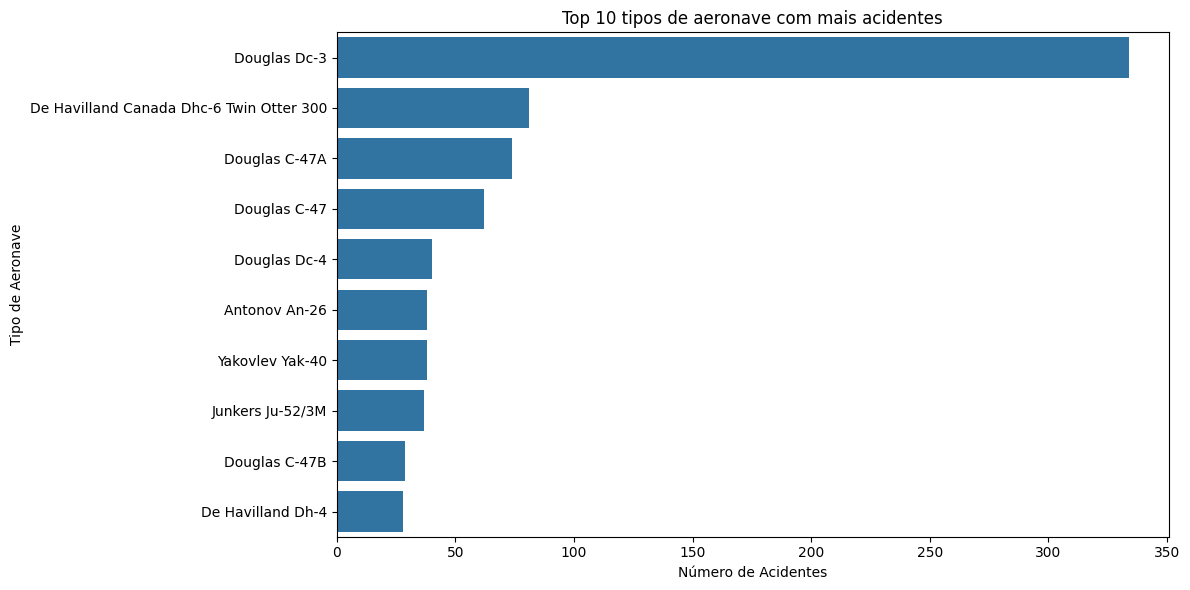

In [40]:
top_tipos = df['Type'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_tipos.values, y=top_tipos.index)
plt.title('Top 10 tipos de aeronave com mais acidentes')
plt.xlabel('Número de Acidentes')
plt.ylabel('Tipo de Aeronave')
plt.tight_layout()
plt.show()

📆 Acidentes por década com barra empilhada por gravidade

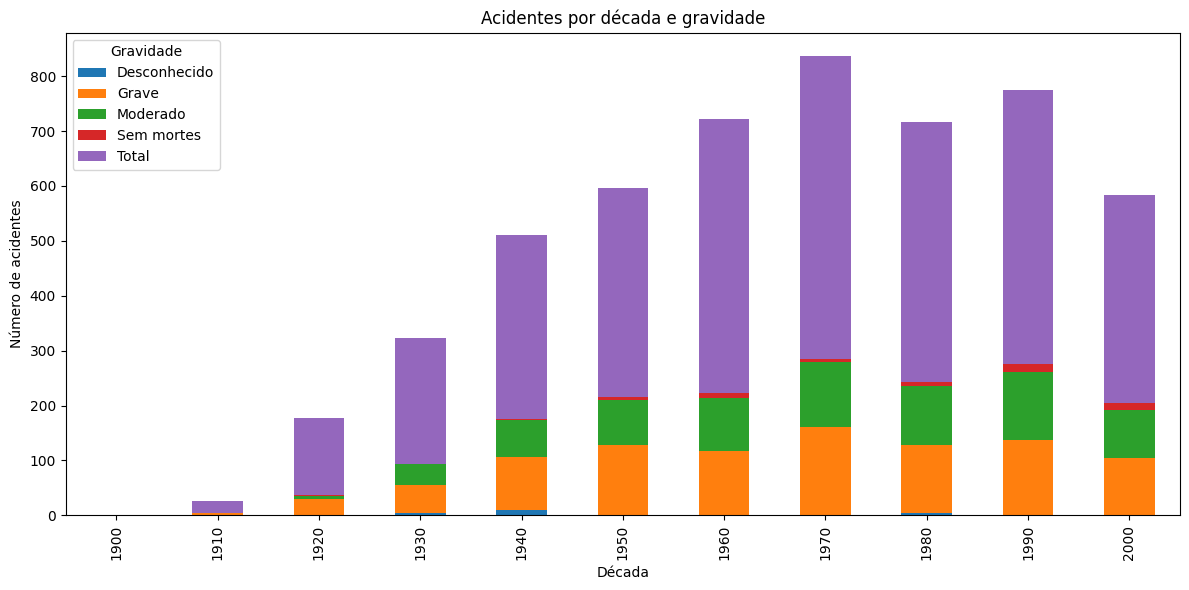

In [41]:
acidentes_por_decada_gravidade = df.groupby(['Decade', 'Gravidade']).size().unstack(fill_value=0)

acidentes_por_decada_gravidade.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Acidentes por década e gravidade')
plt.xlabel('Década')
plt.ylabel('Número de acidentes')
plt.tight_layout()
plt.show()
